<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(e_hat)_0_1_0_9_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.336816,74.431021,30.997734,-0.040003,150.725567,150.805191,-0.079624
1,0.0,1.0,33.969449,80.402982,42.421928,0.151306,166.945666,166.835749,0.109916
2,0.0,2.0,96.009165,92.090235,22.585177,-0.526779,220.157797,220.053484,0.104312
3,0.0,3.0,99.679309,25.857353,55.828214,0.096040,191.460916,190.948217,0.512699
4,0.0,4.0,45.249073,82.379882,99.776968,-0.049189,237.356733,237.371132,-0.014399
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,55.786201,25.376342,45.906771,0.125046,137.194361,137.050586,0.143775
19996,999.0,16.0,63.392235,77.760519,43.832897,0.498165,195.483816,194.999423,0.484392
19997,999.0,17.0,25.013296,90.712708,41.602534,0.328096,167.656634,167.587716,0.068918
19998,999.0,18.0,30.310412,26.244188,85.573290,0.073301,152.201192,151.960324,0.240867


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.336816,74.431021,30.997734,-0.040003,150.725567,150.805191,-0.079624
1,0.0,1.0,33.969449,80.402982,42.421928,0.151306,166.945666,166.835749,0.109916
2,0.0,2.0,96.009165,92.090235,22.585177,-0.526779,220.157797,220.053484,0.104312
3,0.0,3.0,99.679309,25.857353,55.828214,0.096040,191.460916,190.948217,0.512699
4,0.0,4.0,45.249073,82.379882,99.776968,-0.049189,237.356733,237.371132,-0.014399
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,55.786201,25.376342,45.906771,0.125046,137.194361,137.050586,0.143775
19996,999.0,16.0,63.392235,77.760519,43.832897,0.498165,195.483816,194.999423,0.484392
19997,999.0,17.0,25.013296,90.712708,41.602534,0.328096,167.656634,167.587716,0.068918
19998,999.0,18.0,30.310412,26.244188,85.573290,0.073301,152.201192,151.960324,0.240867


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.336816  74.431021  30.997734  ...  150.725567  150.805191 -0.079624
      1.0    33.969449  80.402982  42.421928  ...  166.945666  166.835749  0.109916
      2.0    96.009165  92.090235  22.585177  ...  220.157797  220.053484  0.104312
      3.0    99.679309  25.857353  55.828214  ...  191.460916  190.948217  0.512699
      4.0    45.249073  82.379882  99.776968  ...  237.356733  237.371132 -0.014399
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   55.786201  25.376342  45.906771  ...  137.194361  137.050586  0.143775
      16.0   63.392235  77.760519  43.832897  ...  195.483816  194.999423  0.484392
      17.0   25.013296  90.712708  41.602534  ...  167.656634  167.587716  0.068918
      18.0   30.310412  26.244188  85.573290  ...  152.201192  151.960324  0.240867
      19.0   23.968155  91.339374  66.456669  ...  190.878716  191.846944 -0.968228

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.336816  74.431021  30.997734  ...  150.725567  150.805191 -0.079624
      1.0    33.969449  80.402982  42.421928  ...  166.945666  166.835749  0.109916
      2.0    96.009165  92.090235  22.585177  ...  220.157797  220.053484  0.104312
      3.0    99.679309  25.857353  55.828214  ...  191.460916  190.948217  0.512699
      4.0    45.249073  82.379882  99.776968  ...  237.356733  237.371132 -0.014399
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   55.786201  25.376342  45.906771  ...  137.194361  137.050586  0.143775
      16.0   63.392235  77.760519  43.832897  ...  195.483816  194.999423  0.484392
      17.0   25.013296  90.712708  41.602534  ...  167.656634  167.587716  0.068918
      18.0   30.310412  26.244188  85.573290  ...  152.201192  151.960324  0.240867
      19.0   23.968155  91.339374  66.456669  ...  190.878716  191.846944 -0.968228

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.336816,74.431021,30.997734,-0.040003,150.725567,150.805191,-0.079624
1,0.0,1.0,33.969449,80.402982,42.421928,0.151306,166.945666,166.835749,0.109916
2,0.0,2.0,96.009165,92.090235,22.585177,-0.526779,220.157797,220.053484,0.104312
3,0.0,3.0,99.679309,25.857353,55.828214,0.096040,191.460916,190.948217,0.512699
4,0.0,4.0,45.249073,82.379882,99.776968,-0.049189,237.356733,237.371132,-0.014399
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,55.786201,25.376342,45.906771,0.125046,137.194361,137.050586,0.143775
19996,999.0,16.0,63.392235,77.760519,43.832897,0.498165,195.483816,194.999423,0.484392
19997,999.0,17.0,25.013296,90.712708,41.602534,0.328096,167.656634,167.587716,0.068918
19998,999.0,18.0,30.310412,26.244188,85.573290,0.073301,152.201192,151.960324,0.240867


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    35.336816  74.431021  30.997734  ...  150.725567  150.805191 -0.079624
      1.0    33.969449  80.402982  42.421928  ...  166.945666  166.835749  0.109916
      2.0    96.009165  92.090235  22.585177  ...  220.157797  220.053484  0.104312
      3.0    99.679309  25.857353  55.828214  ...  191.460916  190.948217  0.512699
      4.0    45.249073  82.379882  99.776968  ...  237.356733  237.371132 -0.014399
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   55.786201  25.376342  45.906771  ...  137.194361  137.050586  0.143775
      16.0   63.392235  77.760519  43.832897  ...  195.483816  194.999423  0.484392
      17.0   25.013296  90.712708  41.602534  ...  167.656634  167.587716  0.068918
      18.0   30.310412  26.244188  85.573290  ...  152.201192  151.960324  0.240867
      19.0   23.968155  91.339374  66.456669  ...  190.878716  191.846944 -0.968228

[20000 rows x 7 columns]

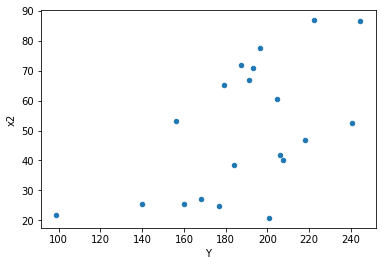

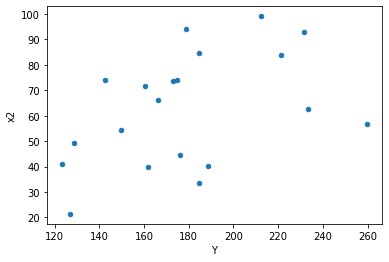

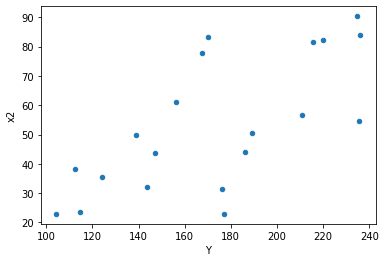

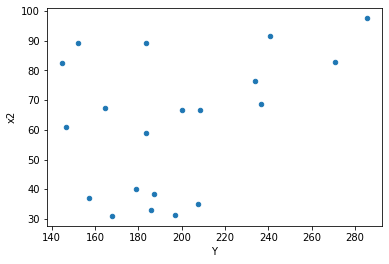

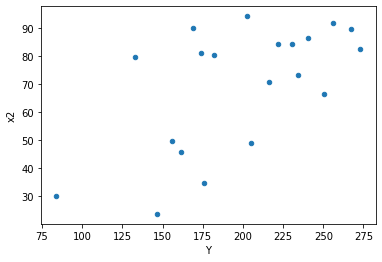

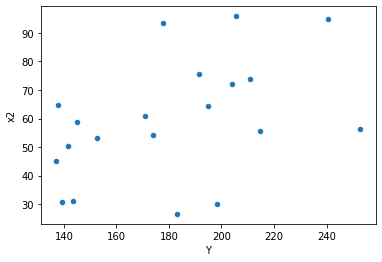

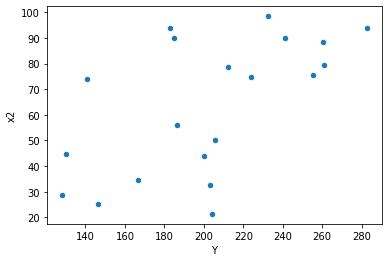

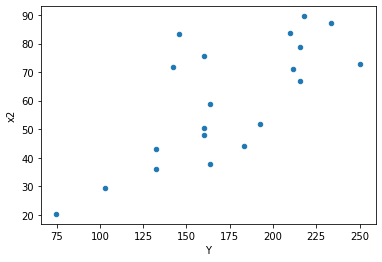

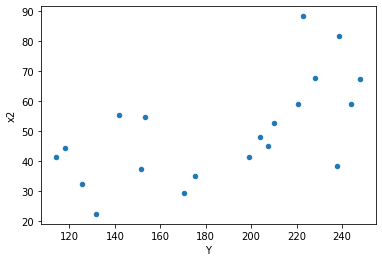

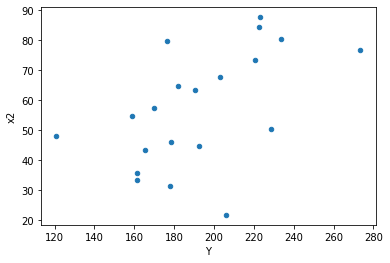

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('e_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,0.21383052818603346,0.27108827659694557,0.04276610563720669,0.054217655319389116,1.2677716268890178,0.8009407445311818,0.5995296277344091,0.4004703722655909,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.7857595643393165,0.8456496186687127,0.15715191286786329,0.16912992373374253,1.0762193131937923,0.9377200898369309,0.5311399550815346,0.46886004491846545,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.31793883604023976,2.8071719832597295,0.06358776720804796,0.5614343966519459,8.82928307287519,0.03203796512427237,0.9839810174378638,0.016018982562136186,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,0.3133090807649088,0.48903755773142943,0.06266181615298176,0.09780751154628589,1.5608789778371548,0.6370365307479249,0.6814817346260376,0.31851826537396244,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,0.1635488051233109,1.7885218884605556,0.03270976102466218,0.3577043776921111,10.935707461219687,0.020126419158841502,0.9899367904205792,0.010063209579420751,Reject005=0 : Heteroscedasticity
13.0,5.0,5.0,0.654799805480219,1.157430257351825,0.1309599610960438,0.231486051470365,1.7676093481777768,0.54704746041332,0.72647626979334,0.27352373020666,Reject005=1 : Homoscedasticity
14.0,5.0,5.0,0.8028347698604906,1.4597982468857007,0.16056695397209814,0.29195964937714014,1.8183047143553226,0.5275929165384987,0.7362035417307506,0.26379645826924936,Reject005=1 : Homoscedasticity
15.0,5.0,5.0,0.018386547135197627,0.4252316139681349,0.0036773094270395254,0.08504632279362698,23.127322973768578,0.003632389162383287,0.9981838054188084,0.0018161945811916436,Reject005=0 : Heteroscedasticity
17.0,5.0,5.0,0.3245470179288282,1.151220695554907,0.06490940358576563,0.23024413911098138,3.5471615265538037,0.19092101841768305,0.9045394907911585,0.09546050920884153,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2.100011449733355,0.46158586180959305,0.420002289946671,0.09231717236191861,0.21980159292379195,0.12188238202577253,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.21383052818603346,0.27108827659694557,0.04276610563720669,0.054217655319389116,1.2677716268890178,0.8009407445311818,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.7857595643393165,0.8456496186687127,0.15715191286786329,0.16912992373374253,1.0762193131937923,0.9377200898369309,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.31793883604023976,2.8071719832597295,0.06358776720804796,0.5614343966519459,8.82928307287519,0.03203796512427237,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.7127824770103681,0.11096325973517,0.14255649540207363,0.022192651947034,0.15567618917988066,0.062194588843719714,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.3133090807649088,0.48903755773142943,0.06266181615298176,0.09780751154628589,1.5608789778371548,0.6370365307479249,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,1.7864465919781574,0.4690709433322966,0.3572893183956315,0.09381418866645932,0.26257204969832754,0.16853432261646278,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.3888837706211816,0.11909876124858075,0.07777675412423632,0.02381975224971615,0.30625798823730527,0.21996736647230036,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,1.8504631759392176,0.4359650296775742,0.3700926351878435,0.08719300593551485,0.23559778727090674,0.13859394752780563,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      823
Reject005=0 : Heteroscedasticity    177
Name: Result_test, dtype: int64